### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [67]:
data = pd.read_csv('data/coupons.csv')

In [68]:
data.head()
# data['Bar'].value_counts()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [69]:
data.isnull().sum()
d=data.duplicated().sum()
data.describe()
di=data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [70]:
data = data.dropna() #remove nan raw 
def convert_bar_visits_to_numbers(value):
    if value == 'never':
        return 0
    elif value == 'less1':
        return 0.5  
    elif value == '1~3':
        return 2 
    elif value == '4~8':
        return 6  
    elif value == 'gt8':
        return 9  
    else:
        return None

data['Bar'] = data['Bar'].apply(convert_bar_visits_to_numbers)

data['age'] = data['age'].astype(int)

#-------------------------------------------

def convert_visits_to_numbers(value):
    if value == 'never':
        return 0
    elif value == 'less1':
        return 0.5  
    elif value == '1~3':
        return 2  
    elif value == '4~8':
        return 6  
    elif value == 'gt8':
        return 9  
    else:
        return None

data['RestaurantLessThan20'] = data['RestaurantLessThan20'].apply(convert_visits_to_numbers)


def convert_income_to_numbers(value):
    if value == '$12500 - $24999':
        return 18750 
    else:
        return None

data['income'] = data['income'].apply(convert_income_to_numbers)


4. What proportion of the total observations chose to accept the coupon? 



In [71]:

total_observations = data.shape[0] 
accepted_observations = data[data['Y'] == 1].shape[0]  

proportion_accepted = accepted_observations / total_observations  

print(f"The proportion of total observations that chose to accept the coupon is {proportion_accepted * 100}%" , type(data))


The proportion of total observations that chose to accept the coupon is 57.407407407407405% <class 'pandas.core.frame.DataFrame'>


5. Use a bar plot to visualize the `coupon` column.

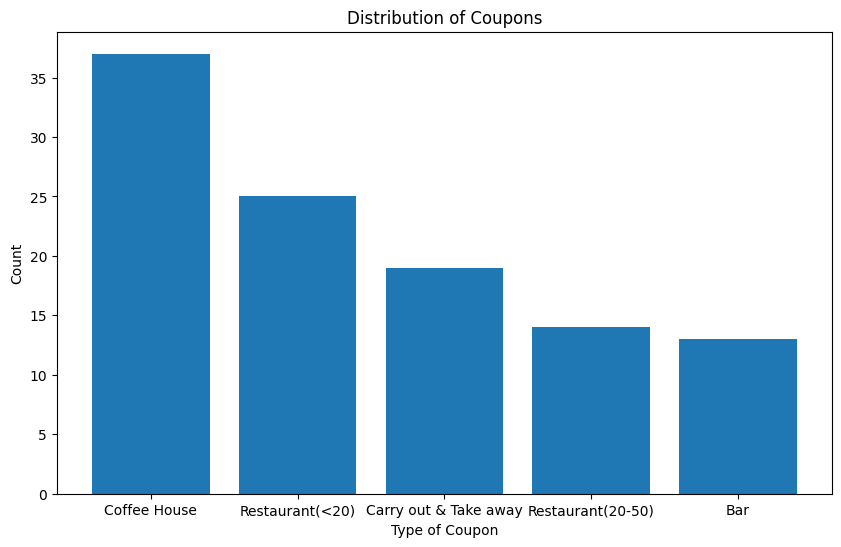

In [72]:
import matplotlib.pyplot as plt
coupon_counts = data['coupon'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(coupon_counts.index, coupon_counts.values)
plt.xlabel('Type of Coupon')
plt.ylabel('Count')
plt.title('Distribution of Coupons')
plt.show()


6. Use a histogram to visualize the temperature column.

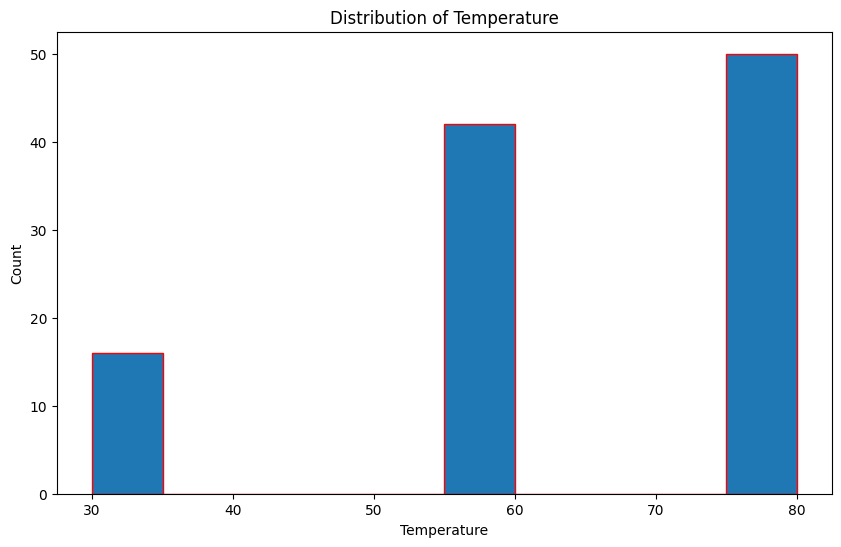

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(data['temperature'], bins=10, edgecolor='red')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Distribution of Temperature')
plt.show()


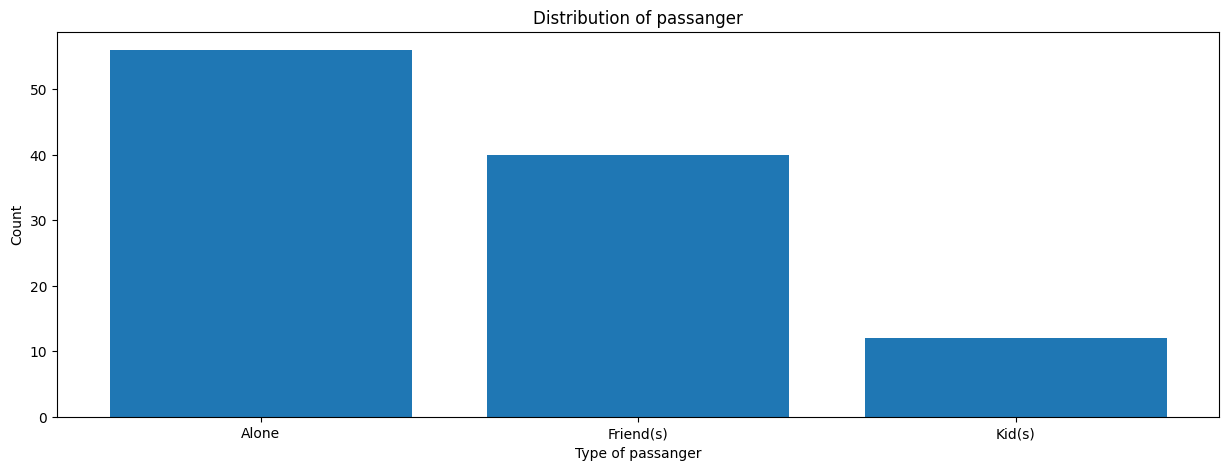

In [74]:
pas = data['passanger'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(pas.index , pas.values)
plt.xlabel('Type of passanger')
plt.ylabel('Count')
plt.title('Distribution of passanger')
plt.show()


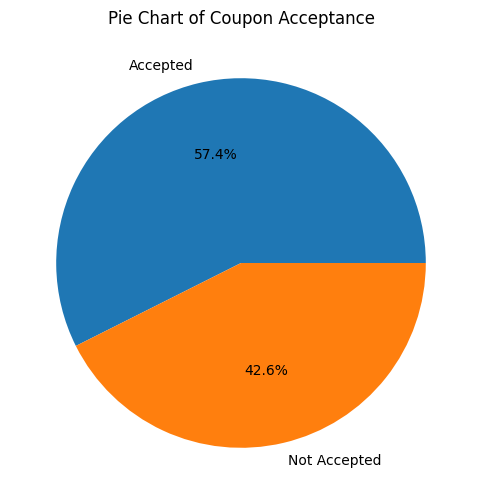

In [75]:

accepted = data[data['Y'] == 1].shape[0]
not_accepted = data[data['Y'] == 0].shape[0]

labels = ['Accepted', 'Not Accepted']
sizes = [accepted, not_accepted]

plt.figure(figsize=(10,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart of Coupon Acceptance')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [76]:
data = data[data['coupon'] == 'Bar']
data['CarryAway']




1239    4~8
1250    4~8
1254    4~8
2613    1~3
2617    1~3
2621    1~3
3101    1~3
3105    1~3
3109    1~3
7313    1~3
7321    1~3
8284    1~3
8292    1~3
Name: CarryAway, dtype: object

2. What proportion of bar coupons were accepted?


In [77]:
total_bar_coupons = data.shape[0]  
accepted_bar_coupons = data[data['Y'] == 1].shape[0]

if total_bar_coupons == 0 :

    print(total_bar_coupons)
    
else :

    proportion_accepted_bar = accepted_bar_coupons / total_bar_coupons  # حساب النسبة المئوية

    print(f"The proportion of bar coupons that were accepted is {proportion_accepted_bar * 100}%")    



The proportion of bar coupons that were accepted is 23.076923076923077%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


The acceptance rate for people who went to a bar 3 or fewer times a month is 9.090909090909092%
The acceptance rate for people who went to a bar more than 3 times a month is 100.0%


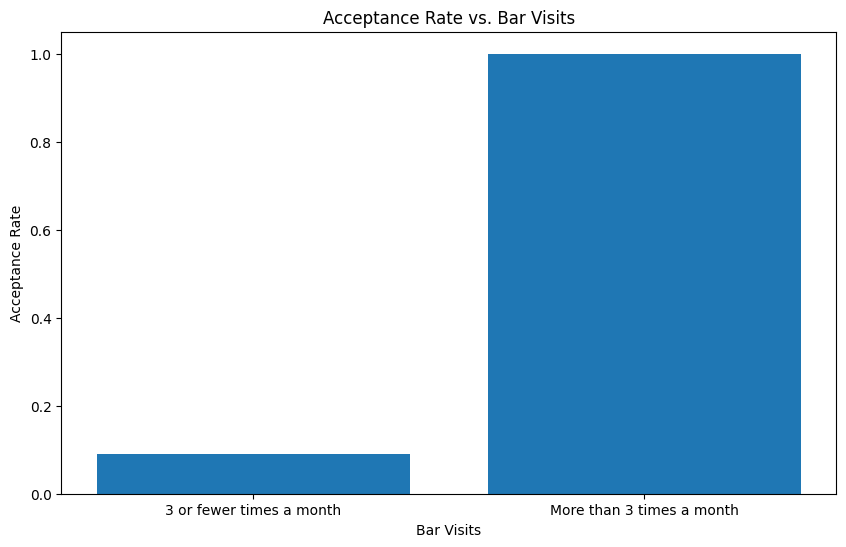

In [78]:
data['Bar'].unique()
less_than_equal_to_3 = data[data['Bar'] <= 3]
accepted_less_than_equal_to_3 = less_than_equal_to_3[less_than_equal_to_3['Y'] == 1].shape[0]

more_than_3 = data[data['Bar'] > 3]
accepted_more_than_3 = more_than_3[more_than_3['Y'] == 1].shape[0]

acceptance_rate_less_than_equal_to_3 = accepted_less_than_equal_to_3 / less_than_equal_to_3.shape[0]
acceptance_rate_more_than_3 = accepted_more_than_3 / more_than_3.shape[0]

print(f"The acceptance rate for people who went to a bar 3 or fewer times a month is {acceptance_rate_less_than_equal_to_3 * 100}%")
print(f"The acceptance rate for people who went to a bar more than 3 times a month is {acceptance_rate_more_than_3 * 100}%")
labels = ['3 or fewer times a month', 'More than 3 times a month']
values = [acceptance_rate_less_than_equal_to_3, acceptance_rate_more_than_3]

plt.figure(figsize=(10,6))
plt.bar(labels, values)
plt.xlabel('Bar Visits')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate vs. Bar Visits')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


The acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is 100.0%
The acceptance rate for all other drivers is 9.090909090909092%


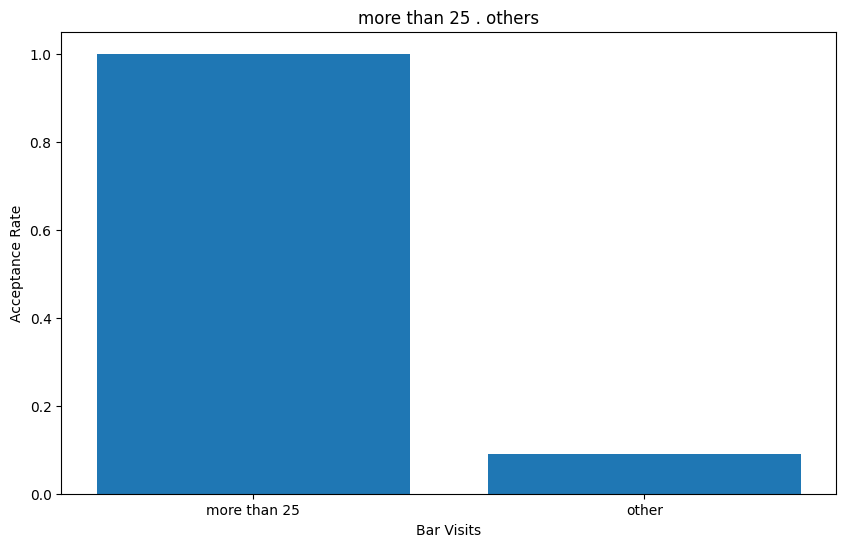

In [91]:

more_than_once_and_over_25 = data[(data['Bar'] > 1) & (data['age'] > 25)]
accepted_more_than_once_and_over_25 = more_than_once_and_over_25[more_than_once_and_over_25['Y'] == 1].shape[0]

all_others = data[~((data['Bar'] > 1) & (data['age'] > 25))]
accepted_all_others = all_others[all_others['Y'] == 1].shape[0]

acceptance_rate_more_than_once_and_over_25 = accepted_more_than_once_and_over_25 / more_than_once_and_over_25.shape[0]
acceptance_rate_all_others = accepted_all_others / all_others.shape[0]

print(f"The acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is {acceptance_rate_more_than_once_and_over_25 * 100}%")
print(f"The acceptance rate for all other drivers is {acceptance_rate_all_others * 100}%")

labels = ['more than 25', 'other']
values = [acceptance_rate_more_than_once_and_over_25, acceptance_rate_all_others]

plt.figure(figsize=(10,6))
plt.bar(labels, values)
plt.xlabel('Bar Visits')
plt.ylabel('Acceptance Rate')
plt.title('more than 25 . others')
plt.show()


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [80]:
more_than_once_and_not_kid_and_not_farming = data[(data['Bar'] > 1) & (data['passanger'] != 'kid') & (~data['occupation'].isin(['farming', 'fishing', 'forestry']))]
accepted_more_than_once_and_not_kid_and_not_farming = more_than_once_and_not_kid_and_not_farming[more_than_once_and_not_kid_and_not_farming['Y'] == 1].shape[0]

all_others = data[~((data['Bar'] > 1) & (data['passanger'] != 'kid') & (~data['occupation'].isin(['farming', 'fishing', 'forestry'])))]
accepted_all_others = all_others[all_others['Y'] == 1].shape[0]

acceptance_rate_more_than_once_and_not_kid_and_not_farming = accepted_more_than_once_and_not_kid_and_not_farming / more_than_once_and_not_kid_and_not_farming.shape[0]
acceptance_rate_all_others = accepted_all_others / all_others.shape[0]

print(f"The acceptance rate for drivers who go to a bar more than once a month,\n had passengers that were not a kid, and had occupations other than farming, fishing, or forestry is {acceptance_rate_more_than_once_and_not_kid_and_not_farming * 100}%")
print(f"\n The acceptance rate for all other drivers is {acceptance_rate_all_others * 100}%")


The acceptance rate for drivers who go to a bar more than once a month,
 had passengers that were not a kid, and had occupations other than farming, fishing, or forestry is 100.0%

 The acceptance rate for all other drivers is 9.090909090909092%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [81]:

condition_1 = (data['Bar'] > 1) & (data['passanger'] != 'kid') & (data['maritalStatus'] != 'widowed')
condition_2 = (data['Bar'] > 1) & (data['age'] < 30)
condition_3 = (data['RestaurantLessThan20'] > 4) & (data['income'] < 50000)
matching_conditions = data[condition_1 | condition_2 | condition_3]
accepted_matching_conditions = matching_conditions[matching_conditions['Y'] == 1].shape[0]

all_others = data[~(condition_1 | condition_2 | condition_3)]
accepted_all_others = all_others[all_others['Y'] == 1].shape[0]

acceptance_rate_matching_conditions = accepted_matching_conditions / matching_conditions.shape[0]
acceptance_rate_all_others = accepted_all_others / all_others.shape[0]

print(f"The acceptance rate for drivers who match any of the three conditions is {acceptance_rate_matching_conditions * 100}%")
print(f"The acceptance rate for all other drivers is {acceptance_rate_all_others * 100}%")


The acceptance rate for drivers who match any of the three conditions is 100.0%
The acceptance rate for all other drivers is 9.090909090909092%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations, we might hypothesize the following about drivers who accepted the bar coupons:

1. **Frequency of Bar Visits**: Drivers who visit bars more frequently (more than once a month) are more likely to accept the bar coupons. This could be because they find more value in the coupons as they tend to spend more at bars.

2. **Age Factor**: Drivers over the age of 25 are more likely to accept the bar coupons. This could be due to a variety of reasons such as higher disposable income, more leisure time, or a larger social circle.

3. **Passenger Type**: Drivers who usually have passengers that are not kids are more likely to accept the bar coupons. This could be because bars are typically adult-oriented venues.

4. **Occupation**: Drivers who are not engaged in farming, fishing, or forestry occupations are more likely to accept the bar coupons. This might be because these occupations may not align well with frequent bar visits due to their demanding nature or rural work locations.


In [82]:
# ^^^^^^^^^^^^^^^^^^^^^^^

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [83]:
data2 = pd.read_csv('data/coupons.csv')
data2['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [84]:
coffeehouse_df = data2[data2['coupon'] == 'Coffee House']
coffeehouse_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [85]:
total_coffeehouse_coupons = coffeehouse_df.shape[0]
accepted_coffeehouse_coupons = coffeehouse_df[coffeehouse_df['Y'] == 1].shape[0]
acceptance_rate_coffeehouse = accepted_coffeehouse_coupons / total_coffeehouse_coupons


In [86]:
for passenger_type in coffeehouse_df['passanger'].unique():
    total = coffeehouse_df[coffeehouse_df['passanger'] == passenger_type].shape[0]
    accepted = coffeehouse_df[(coffeehouse_df['passanger'] == passenger_type) & (coffeehouse_df['Y'] == 1)].shape[0]
    acceptance_rate = accepted / total
    print(f"The acceptance rate for {passenger_type} passengers is {acceptance_rate * 100}%")


The acceptance rate for Friend(s) passengers is 59.69055374592834%
The acceptance rate for Kid(s) passengers is 48.309178743961354%
The acceptance rate for Alone passengers is 43.794326241134755%
The acceptance rate for Partner passengers is 57.049180327868854%


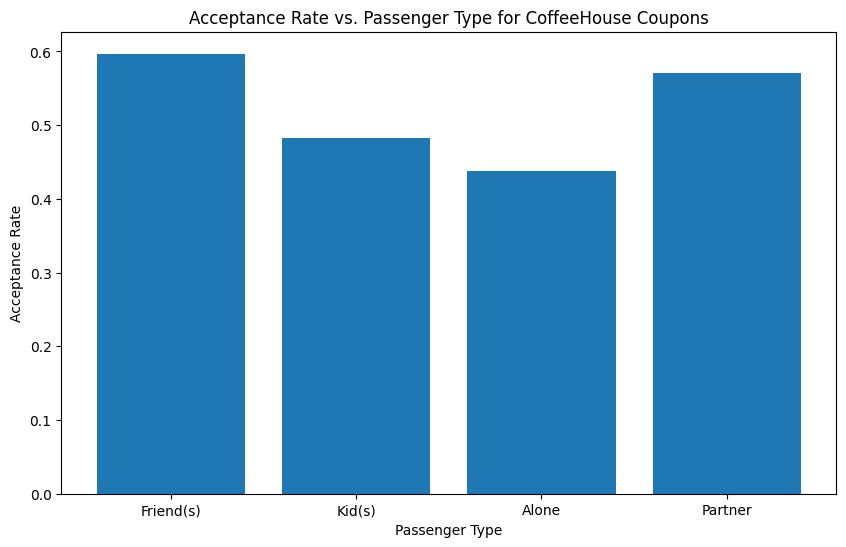

In [87]:
import matplotlib.pyplot as plt

passenger_types = coffeehouse_df['passanger'].unique()
acceptance_rates = [coffeehouse_df[(coffeehouse_df['passanger'] == passenger_type) & (coffeehouse_df['Y'] == 1)].shape[0] / coffeehouse_df[coffeehouse_df['passanger'] == passenger_type].shape[0] for passenger_type in passenger_types]

plt.figure(figsize=(10,6))
plt.bar(passenger_types, acceptance_rates)
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate vs. Passenger Type for CoffeeHouse Coupons')
plt.show()



C:\Users\Asus\AppData\Local\Temp\ipykernel_11784\1483075700.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot( y='Acceptance Rate', data=df , color='red', hue='Passenger Type')


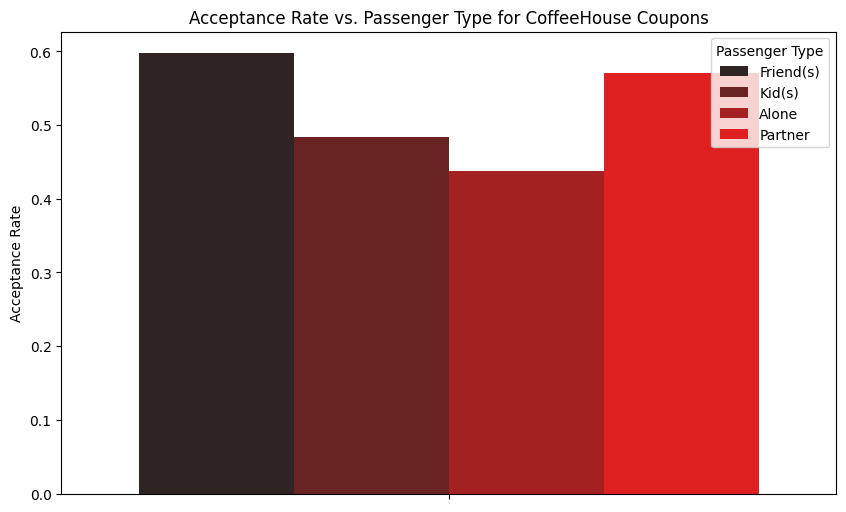

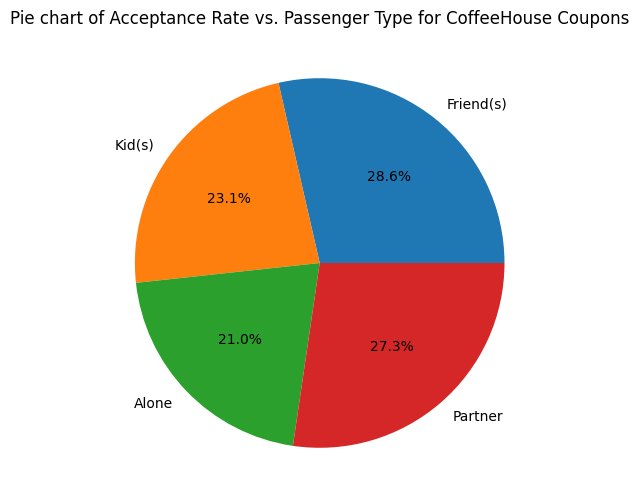

In [88]:
import seaborn as sns

acceptance_rates = {passenger_type: coffeehouse_df[(coffeehouse_df['passanger'] == passenger_type) & (coffeehouse_df['Y'] == 1)].shape[0] / coffeehouse_df[coffeehouse_df['passanger'] == passenger_type].shape[0] for passenger_type in passenger_types}

df = pd.DataFrame(list(acceptance_rates.items()), columns=['Passenger Type', 'Acceptance Rate'])

plt.figure(figsize=(10,6))
sns.barplot( y='Acceptance Rate', data=df , color='red', hue='Passenger Type')
plt.title('Acceptance Rate vs. Passenger Type for CoffeeHouse Coupons')
plt.show()

plt.figure(figsize=(10,6))
plt.pie(df['Acceptance Rate'], labels = df['Passenger Type'], autopct='%1.1f%%')
plt.title('Pie chart of Acceptance Rate vs. Passenger Type for CoffeeHouse Coupons')
plt.show()


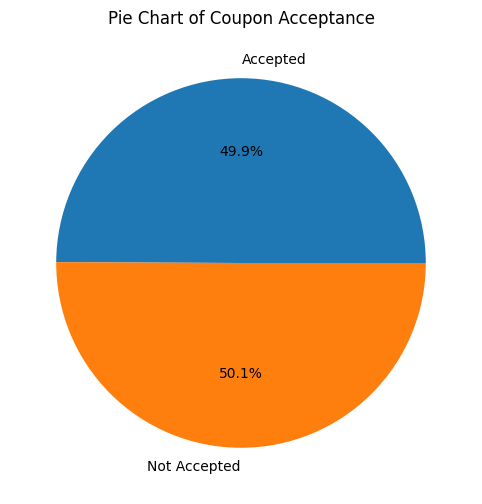

In [89]:

accepted = coffeehouse_df[coffeehouse_df['Y'] == 1].shape[0]
not_accepted = coffeehouse_df[coffeehouse_df['Y'] == 0].shape[0]

labels = ['Accepted', 'Not Accepted']
sizes = [accepted, not_accepted]


plt.figure(figsize=(10,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart of Coupon Acceptance')
plt.show()